In [183]:
''' 
    Archivos obtenidos:

        'Poblacion_Mexicana_Anual.csv'
        'Complet_Set_Abuse_&_pob_by_year.csv' ------------ Es el que estaremos usando ahorita.



    Ideas al respecto:
        Con SQL obtener la lista de los meses restantes para ver una validacion.
'''

''' 
    Consejos extra:

        Recuerda usar sum, en lugar de count, sum si sirve para contar los valores Null count cuenta los registros
        
        Exactamente, df_poblacion_mex.isnull().count() te está devolviendo la cantidad de registros (filas) en cada columna de tu DataFrame, no la cantidad de valores nulos. 
        En este caso, tienes 32 registros en cada columna, que corresponden a los 32 estados de la república. Para contar los valores nulos, sería mejor utilizar 
'''

' Consejos extra:'

In [159]:
# importe de librerias
import numpy as np # manejo de dataframes y ese tipo de cosas, en otras palabras no sabemos para que es numpy
import pandas as pd # Proporciona soporte para arrays (vectores y matrices)
import matplotlib.pyplot as plt # Graficar nuestros dataframes
import seaborn as sns # graficar nuestro dataframe
import tabulate #Presentacion de listas o en la consola

In [160]:
# Lectura de archivo csv

df_poblacion_mex = pd.read_csv('Poblacion_Mexicana_Mod.csv')



## Tratamiento de DF _ Poblacion Mexicana _ Duplicated Values and Missing Values

In [161]:
'''
1. Desde la lectura viene con una columna adiccional llamado Unnamed.

2. Valores duplicados en nuestro df: 'Quintana Roo', 'Nayarit, lo cual nos deja con la ausencia de 2 estados con sus poblaciones por a;o

3. Los tipos de datos no coincidieron en las columnas para su union, esto genera un problema ya que no se pueden unir de esta manera
'''

"\n1. Desde la lectura viene con una columna adiccional llamado Unnamed.\n\n2. Valores duplicados en nuestro df: 'Quintana Roo', 'Nayarit, lo cual nos deja con la ausencia de 2 estados con sus poblaciones por a;o\n\n3. Los tipos de datos no coincidieron en las columnas para su union, esto genera un problema ya que no se pueden unir de esta manera\n"

In [162]:
print(df_poblacion_mex.head(3))

   Unnamed: 0               Estado     2015     2016     2017     2018  \
0           0       Aguascalientes  1326528  1348697  1371285  1394350   
1           1      Baja California  3502091  3554774  3608038  3661896   
2           2  Baja California Sur   762351   776706   791465   806637   

      2019     2020     2021     2022     2023  
0  1417886  1441884  1466342  1491262  1516648  
1  3716360  3771441  3827153  3883494  3940467  
2   822233   838264   854738   871659   888938  


In [197]:
df_poblacion_mex.isnull().count()
# null_data = df_poblacion_mex[df_poblacion_mex.isnull().any(axis=1)]
# null_data


Estado    32
2015      32
2016      32
2017      32
2018      32
2019      32
2020      32
2021      32
2022      32
2023      32
dtype: int64

In [163]:
#Elimiancion de columna
df_poblacion_mex.drop(columns=['Unnamed: 0'], inplace = True)

In [139]:
print(df_poblacion_mex.head(3))

                Estado     2015     2016     2017     2018     2019     2020  \
0       Aguascalientes  1326528  1348697  1371285  1394350  1417886  1441884   
1      Baja California  3502091  3554774  3608038  3661896  3716360  3771441   
2  Baja California Sur   762351   776706   791465   806637   822233   838264   

      2021     2022     2023  
0  1466342  1491262  1516648  
1  3827153  3883494  3940467  
2   854738   871659   888938  


In [164]:
# Tenemos 30 estados unicos, nos hacen falta 2
df_poblacion_mex.Estado.nunique()

30

In [165]:
# Existen duplicados 30 != de 32 de echo hay dos duplicados
df_poblacion_mex.Estado.count()

32

In [166]:
'''Revision y eliminacion de valores duplicados, en el area de los estados'''

# 1. Obten los valores únicos de la columna y conviértelos en una lista
valores_unicos = df_poblacion_mex['Estado'].unique()

# 2. Verifica si hay valores duplicados en la lista de valores únicos
# en otras palabras verifica si hay mas de una coincidencia que lo agrege a la list comprehention
duplicados = [item for item in valores_unicos if list(df_poblacion_mex['Estado']).count(item) > 1]

# 3. Ahora, puedes imprimir los valores duplicados si los hay.
if not duplicados:
    print("No hay valores duplicados en la lista de valores únicos.")
else:
    print("Valores duplicados en la lista de valores únicos:")
    print(duplicados)

Valores duplicados en la lista de valores únicos:
['Quintana Roo', 'Nayarit']


In [167]:

# 1. Utiliza el método `duplicated()` para encontrar las filas duplicadas.
filas_duplicadas = df_poblacion_mex[df_poblacion_mex['Estado'].duplicated()]
#print(filas_duplicadas.head(3))

# 2. Luego, puedes usar el método `drop()` para eliminar esas filas del DataFrame original.
df_poblacion_mex_wo_duplicated = df_poblacion_mex.drop(filas_duplicadas.index)

# 3. Ahora, df_sin_duplicados contendrá tu DataFrame original sin las filas que contenían valores duplicados.

# Puedes imprimir df_sin_duplicados para verificar que se eliminaron las filas duplicadas. ya coinciden ambas cantidades de valores 30 - 30
print(df_poblacion_mex_wo_duplicated.Estado.nunique())


30


In [168]:
'''
melt() se utiliza para "derretir" o "apilar" columnas, 
manteniendo la información de 'Año'. Esto crea un DataFrame largo con 
tres columnas: 'Año', 'Estado' y 'Valor'. Es más fácil trabajar con esta estructura para luego pivotear los datos. --- [por como esta estructurado nuestro set de datos]


Pivotear: Una vez que tenemos el DataFrame derretido, utilizamos el método pivot() para girar las filas y las columnas. 
Esto nos permite tener los años como columnas y los valores de 'México' y 'Nuevo León' en las filas. El resultado es un 
DataFrame donde los años son columnas y 'México' y 'Nuevo León' se combinan en la columna 'Estado'.


'''

# Supongamos que tienes el DataFrame original con las columnas 'Año', 'México' y 'Nuevo León'
data = {
    'Año': [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'México': ['122,306,146', '123,605,424', '124,923,181', '126,260,314', '127,618,337', '128,932,489', '130,268,777', '131,628,541', '132,999,898'],
    'Nuevo León': ['5,119,504', '5,232,816', '5,349,155', '5,468,579', '5,591,148', '5,784,442', '5,971,213', '6,161,499', '6,355,642']
}

df_original = pd.DataFrame(data)
#print(df_original)

# 1. Derrite (melt) las columnas 'México' y 'Nuevo León' en una columna 'Estado'
df_melted = pd.melt(df_original, id_vars=['Año'], var_name='Estado', value_name='Valor')
#print(df_melted)

# 2. Pivotea el DataFrame para tener los años como columnas
df_pivoted = df_melted.pivot(index='Estado', columns='Año', values='Valor').reset_index()

# 3. Cambia el nombre de las columnas para que sea más limpio
df_pivoted.columns.name = None

# 4. Verifica el DataFrame final
print(df_pivoted)


       Estado         2015         2016         2017         2018  \
0      México  122,306,146  123,605,424  124,923,181  126,260,314   
1  Nuevo León    5,119,504    5,232,816    5,349,155    5,468,579   

          2019         2020         2021         2022         2023  
0  127,618,337  128,932,489  130,268,777  131,628,541  132,999,898  
1    5,591,148    5,784,442    5,971,213    6,161,499    6,355,642  


In [169]:
#renombramos las columnas estado - estado, para hacer el join vertical
df_pivoted = df_pivoted.rename(columns= {'Estado' : 'State'})

In [170]:
#renombramos las columnas estado - estado, para hacer el join vertical
df_poblacion_mex_wo_duplicated = df_poblacion_mex_wo_duplicated.rename(columns= {'Estado': 'State'})

In [171]:
# Verificación de coincidencia de claves
print(df_pivoted['State'].isin(df_poblacion_mex_wo_duplicated['State']).all())  # Debería imprimir True si todas las claves coinciden

'''Entrega un false lo cual nos indica, que las nombres o variables son diferentes'''

False


'Entrega un false lo cual nos indica, que las nombres o variables son diferentes'

In [172]:
#revision previa para comprobar que estan bien ambos dataframes antes de unir

print(df_poblacion_mex_wo_duplicated.isna().sum())
print(df_pivoted.isna().sum())

#ambos parecen no tener Na values, entonces no deberia haber problemas

State    0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
dtype: int64
State    0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
dtype: int64


In [173]:
#evaluar los conjuntos:
print(df_poblacion_mex_wo_duplicated.head(3))
print(df_pivoted.head(3))

                 State     2015     2016     2017     2018     2019     2020  \
0       Aguascalientes  1326528  1348697  1371285  1394350  1417886  1441884   
1      Baja California  3502091  3554774  3608038  3661896  3716360  3771441   
2  Baja California Sur   762351   776706   791465   806637   822233   838264   

      2021     2022     2023  
0  1466342  1491262  1516648  
1  3827153  3883494  3940467  
2   854738   871659   888938  
        State         2015         2016         2017         2018  \
0      México  122,306,146  123,605,424  124,923,181  126,260,314   
1  Nuevo León    5,119,504    5,232,816    5,349,155    5,468,579   

          2019         2020         2021         2022         2023  
0  127,618,337  128,932,489  130,268,777  131,628,541  132,999,898  
1    5,591,148    5,784,442    5,971,213    6,161,499    6,355,642  


In [174]:
# Verificar que las columnas sean las mismas
# assert revisa una condicion, si la condicion es falza assert envia un error
assert list(df_poblacion_mex_wo_duplicated.columns) == list(df_pivoted.columns), "Las columnas no coinciden"

# nuestros nombres de columnas no coinciden

AssertionError: Las columnas no coinciden

In [175]:
# # Verificar que los tipos de datos sean los mismos
assert list(df_poblacion_mex_wo_duplicated.dtypes) == list(df_pivoted.dtypes), "Los tipos de datos no coinciden"


AssertionError: Los tipos de datos no coinciden

In [185]:
# # correcion para tener el mismo tipo de de valor en las columas:
# for column in df_poblacion_mex_wo_duplicated.columns:
#     df_poblacion_mex_wo_duplicated[column] = df_poblacion_mex_wo_duplicated[column].astype(df_pivoted[column].dtype)
''' Aqui es donde estamos haciendo cambios'''
# print(df_pivoted.dtypes)
# print(df_poblacion_mex_wo_duplicate.dtypes)

for column in df_pivoted.columns[1:]:  # Itera sobre cada columna excepto la primera
    df_pivoted[column] = df_pivoted[column].str.replace(',', '')  # Elimina las comas de los valores
    df_pivoted[column] = df_pivoted[column].astype('int64')  # Convierte los valores a enteros (int64)




In [186]:
'''Otra forma de validacion de decir que no son lo mismo aun que lo parezcan'''

# Obtén los nombres de las columnas de ambos DataFrames
columns_df_poblacion = set(df_poblacion_mex_wo_duplicated.columns)
columns_df_pivoted = set(df_pivoted.columns)

# Encuentra las columnas que están en df_poblacion_mex_wo_duplicated pero no en df_pivoted
columns_in_df_poblacion_not_in_df_pivoted = columns_df_poblacion - columns_df_pivoted
print("Columnas en df_poblacion_mex_wo_duplicated pero no en df_pivoted:", columns_in_df_poblacion_not_in_df_pivoted)

# Encuentra las columnas que están en df_pivoted pero no en df_poblacion_mex_wo_duplicated
columns_in_df_pivoted_not_in_df_poblacion = columns_df_pivoted - columns_df_poblacion
print("Columnas en df_pivoted pero no en df_poblacion_mex_wo_duplicated:", columns_in_df_pivoted_not_in_df_poblacion)


Columnas en df_poblacion_mex_wo_duplicated pero no en df_pivoted: set()
Columnas en df_pivoted pero no en df_poblacion_mex_wo_duplicated: set()


In [187]:
print(df_poblacion_mex_wo_duplicated.dtypes)
print(df_pivoted.dtypes)

State    object
2015      int64
2016      int64
2017      int64
2018      int64
2019      int64
2020      int64
2021      int64
2022      int64
2023      int64
dtype: object
State    object
2015      int64
2016      int64
2017      int64
2018      int64
2019      int64
2020      int64
2021      int64
2022      int64
2023      int64
dtype: object


In [188]:
# Convertir los nombres de las columnas de años a strings en df_pivoted
df_pivoted.columns = df_pivoted.columns.astype(str)

# O convertir los nombres de las columnas de años a strings en df_poblacion_mex_wo_duplicated
df_poblacion_mex_wo_duplicated.columns = df_poblacion_mex_wo_duplicated.columns.astype(str)

# Ahora puedes verificar nuevamente si las columnas coinciden
assert (df_poblacion_mex_wo_duplicated.columns == df_pivoted.columns).all(), "Las columnas no coinciden"


In [189]:
# Asegúrate de que ambos DataFrames tengan las mismas columnas
assert (df_poblacion_mex_wo_duplicated.columns == df_pivoted.columns).all(), "Las columnas no coinciden"

# Une los DataFrames verticalmente
combined_df = pd.concat([df_poblacion_mex_wo_duplicated, df_pivoted], ignore_index=True)

# Verifica el DataFrame combinado
print(combined_df)

combined_df.to_csv('Poblacion_Mexicana_Anual.csv', index = False)

                   State       2015       2016       2017       2018  \
0         Aguascalientes    1326528    1348697    1371285    1394350   
1        Baja California    3502091    3554774    3608038    3661896   
2    Baja California Sur     762351     776706     791465     806637   
3               Campeche     859032     875168     891716     908687   
4   Coahuila de Zaragoza    3079223    3114104    3149407    3185136   
5                 Colima     727178     740378     753948     767904   
6                Chiapas    4799490    4862143    4925280    4988909   
7              Chihuahua    3666388    3714980    3763988    3813422   
8       Estado de México   16602814   16953292   17309958   17673034   
9                Morelos    1776436    1814209    1852550    1891488   
10                Puebla    5641396    5743441    5846835    5951592   
11              Tlaxcala    1346631    1374745    1399680    1422442   
12             Querétaro    1902207    1942555    1983521    202

In [190]:
# recuerda usar count en lugar de sum haha
combined_df.isnull().count()

State    32
2015     32
2016     32
2017     32
2018     32
2019     32
2020     32
2021     32
2022     32
2023     32
dtype: int64

# Tratamiento de DF_ Sex_ Agression

'''Cambios realizados:

    1. Nombre de columnas
    2. Nombres de variables, algunas contenian caracteres especiales / desconocidos que nos daban problemas
    3. Mapeo de meses para converison o data engineer genearcion de columna date con mes y a;o
    
'''

In [92]:
df_sex_agresion =  pd.read_csv('sexual_agre_cleaned.csv')


In [93]:
df_sex_agresion.shape
#  12089 - 6

(12089, 6)

In [94]:
print(df_sex_agresion.head(3))

    A_o  Estado         Tipo_de_abuso      Subtipo_de_Abuso    Mes  Valor
0  2015  Puebla          Acoso sexual          Acoso sexual  Enero     11
1  2015  Puebla  Hostigamiento sexual  Hostigamiento sexual  Enero      1
2  2015  Puebla      Violaci�n simple      Violaci�n simple  Enero     43


In [112]:
#cambio de las variables o nombres de los tipos de abuso
df_sex_agresion['Type_of_abuse'] = df_sex_agresion['Type_of_abuse'].replace('Violaci�n simple', 'Violacion simple')
df_sex_agresion['Type_of_abuse'] = df_sex_agresion['Type_of_abuse'].replace('Violaci�n equiparada', 'Violacion Equiparada')

In [113]:
'''Cambio de nombre a las columanas'''
df_sex_agresion = df_sex_agresion.rename(columns={'A_o' : 'Year'})
df_sex_agresion = df_sex_agresion.rename(columns={'Mes' : 'Month'})
df_sex_agresion = df_sex_agresion.rename(columns={'Estado' : 'State'})
df_sex_agresion = df_sex_agresion.rename(columns={'Tipo_de_abuso' : 'Type_of_abuse'})
df_sex_agresion = df_sex_agresion.rename(columns={'Violaci�n simple' : 'Simple_Violation'})
df_sex_agresion = df_sex_agresion.rename(columns={'Valor' : 'Count'})


#Drop de subtipo_ya que es igual a tipo
df_sex_agresion = df_sex_agresion.drop(columns= 'Subtipo_de_Abuso')


KeyError: "['Subtipo_de_Abuso'] not found in axis"

In [114]:
print(df_sex_agresion.head(3))

   Year   State         Type_of_abuse  Month  Count Month_num       Date
0  2015  Puebla          Acoso sexual  Enero     11        01 2015-01-01
1  2015  Puebla  Hostigamiento sexual  Enero      1        01 2015-01-01
2  2015  Puebla      Violacion simple  Enero     43        01 2015-01-01


In [115]:
df_sex_agresion.isnull().sum()

Year             0
State            0
Type_of_abuse    0
Month            0
Count            0
Month_num        0
Date             0
dtype: int64

In [116]:
df_sex_agresion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12089 entries, 0 to 12088
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           12089 non-null  int64         
 1   State          12089 non-null  object        
 2   Type_of_abuse  12089 non-null  object        
 3   Month          12089 non-null  object        
 4   Count          12089 non-null  int64         
 5   Month_num      12089 non-null  object        
 6   Date           12089 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 661.2+ KB


In [117]:
df_sex_agresion.describe()

,Year,Count,Date
count,12089.000000,12089.000000,12089
mean,2019.002316,24.025891,2019-04-02 09:38:25.798660096
min,2015.000000,0.000000,2015-01-01 00:00:00
25%,2017.000000,1.000000,2017-02-01 00:00:00
50%,2019.000000,8.000000,2019-04-01 00:00:00
75%,2021.000000,29.000000,2021-06-01 00:00:00
max,2023.000000,645.000000,2023-07-01 00:00:00
std,2.581048,44.784881,NaN


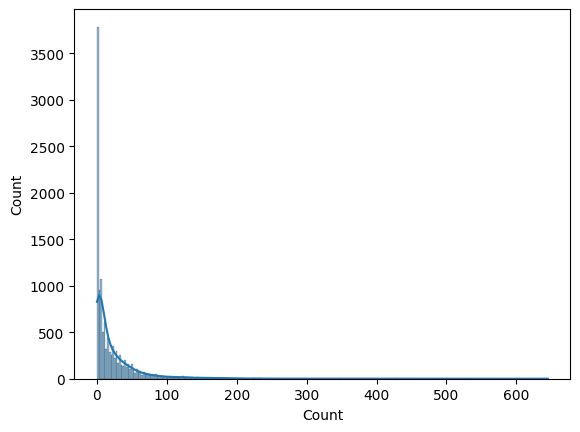

In [101]:
# Ver la distribución de la variable 'Count'
sns.histplot(df_sex_agresion['Count'], kde=True) #Que hace el kde
plt.show()

In [104]:
df_sex_agresion['Type_of_abuse'].unique()

array(['Acoso sexual', 'Hostigamiento sexual', 'Violaci�n simple',
       'Violaci�n equiparada',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Abuso sexual'], dtype=object)

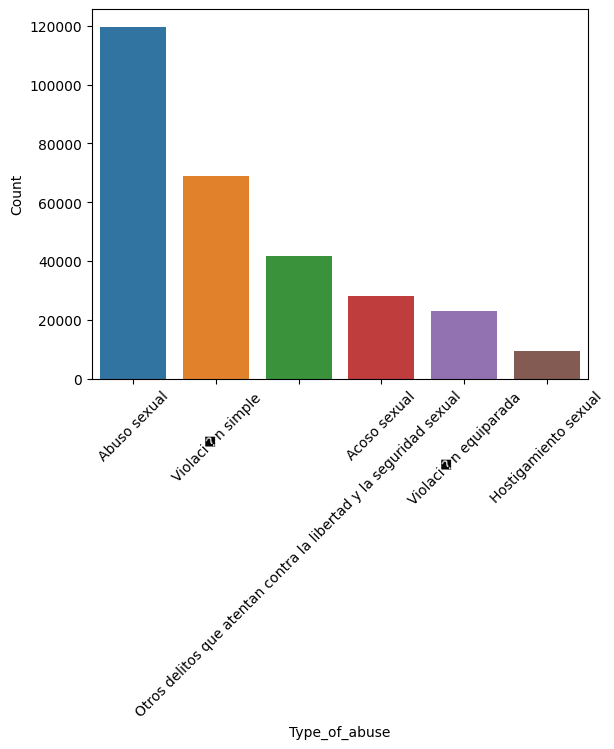

In [102]:
# Ver la sumatoria de 'Count' por tipo de abuso
# df.groupby('Type_of_abuse')['Count'].sum().plot(kind='bar')
# plt.show()

# # Ver la sumatoria de 'Count' por tipo de abuso y ordenarlo
# df_sex_agresion.groupby('Type_of_abuse')['Count'].sum().sort_values().plot(kind='bar')
# plt.show()

# Para orden descendente
# df_sex_agresion.groupby('Type_of_abuse')['Count'].sum().sort_values(ascending=False).plot(kind='bar')
# plt.show()

# Asumiendo df es tu DataFrame
# Crear un nuevo DataFrame con las sumas y ordenarlo
sum_df = df_sex_agresion.groupby('Type_of_abuse')['Count'].sum().reset_index()
sum_df = sum_df.sort_values(by='Count', ascending=False)  # Cambia a True para orden ascendente

# Ahora usar Seaborn para plotear
sns.barplot(data=sum_df, x='Type_of_abuse', y='Count')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejor visualización si es necesario
plt.show()


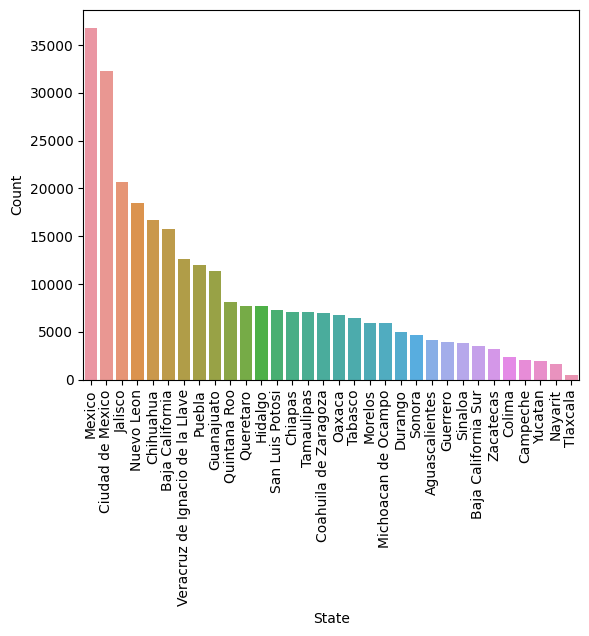

In [105]:
sum_df = df_sex_agresion.groupby('State')['Count'].sum().reset_index()
sum_df = sum_df.sort_values(by='Count', ascending=False)  # Cambia a True para orden ascendente

# Ahora usar Seaborn para plotear
sns.barplot(data=sum_df, x='State', y='Count')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor visualización si es necesario
plt.show()

Conversion de Date a datetimeline para analisis temporal

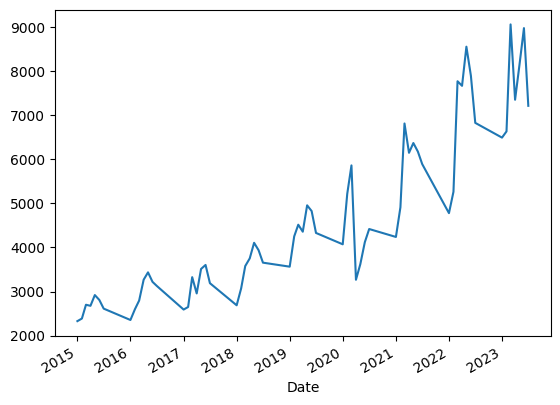

In [118]:
# Mapeo de nombres de meses a números
month_mapping = {
    'Enero': '01',
    'Febrero': '02',
    'Marzo': '03',
    'Abril': '04',
    'Mayo': '05',
    'Junio': '06',
    'Julio': '07',
    'Agosto': '08',
    'Septiembre': '09',
    'Octubre': '10',
    'Noviembre': '11',
    'Diciembre': '12'
}

# Aplicar el mapeo
df_sex_agresion['Month_num'] = df_sex_agresion['Month'].map(month_mapping)

# Ahora, intenta convertir las columnas 'Year' y 'Month_num' a una columna de fecha
df_sex_agresion['Date'] = pd.to_datetime(df_sex_agresion['Year'].astype(str) + '-' + df_sex_agresion['Month_num'])

# Ver la tendencia de 'Count' a lo largo del tiempo
df_sex_agresion.groupby('Date')['Count'].sum().plot()
plt.show()


In [119]:
df_sex_agresion.head(3)

,Year,State,Type_of_abuse,Month,Count,Month_num,Date
0,2015,Puebla,Acoso sexual,Enero,11,01,2015-01-01
1,2015,Puebla,Hostigamiento sexual,Enero,1,01,2015-01-01
2,2015,Puebla,Violacion simple,Enero,43,01,2015-01-01


In [120]:
print(df_sex_agresion.duplicated().sum())

0


In [125]:
''' revision final de unique values para ver que todo esta en orden'''
#df_sex_agresion.Year.unique() # Bien
#df_sex_agresion['State'].nunique() #Bien
#df_sex_agresion['Type_of_abuse'].unique() # Bien
#df_sex_agresion['Month'].unique() # Bien # Dado que solo consideramos los meses similares a esta a;o y debimos considerar mas para la o bueno vamos a crear otro para la proyeccion de este a;o que te parece
#df_sex_agresion['Month_num'].unique() # Bien 
#df_sex_agresion['Date'].unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio'],
      dtype=object)

# Union de los dos data Frames

In [201]:
# revision de null values por si las dudas en ambos dataframes:
print(combined_df.isnull().sum()) # todo bien
print(df_sex_agresion.isnull().sum()) # todo bien 

State    0
2015     0
2016     0
2017     0
2018     0
2019     0
2020     0
2021     0
2022     0
2023     0
dtype: int64
Year             0
State            0
Type_of_abuse    0
Month            0
Count            0
Month_num        0
Date             0
dtype: int64


In [202]:
print(combined_df.head(3))
print(df_sex_agresion.head(3))

                 State     2015     2016     2017     2018     2019     2020  \
0       Aguascalientes  1326528  1348697  1371285  1394350  1417886  1441884   
1      Baja California  3502091  3554774  3608038  3661896  3716360  3771441   
2  Baja California Sur   762351   776706   791465   806637   822233   838264   

      2021     2022     2023  
0  1466342  1491262  1516648  
1  3827153  3883494  3940467  
2   854738   871659   888938  
   Year   State         Type_of_abuse  Month  Count Month_num       Date
0  2015  Puebla          Acoso sexual  Enero     11        01 2015-01-01
1  2015  Puebla  Hostigamiento sexual  Enero      1        01 2015-01-01
2  2015  Puebla      Violacion simple  Enero     43        01 2015-01-01


In [209]:
# validacion de que la columna state contenga los mismos valores
set_1 = set(combined_df['State'])
set_2 = set(df_sex_agresion['State'])

if set_1 == set_2 :
    print('Los valores coinciden')
else:
    print('Los valores no coinciden')

# Si hay una discrepancia, puedes usar la diferencia de conjuntos para ver qué valores son diferentes
if set_1 != set_2:
    print("Valores en df1 pero no en df2:", set_1 - set_2)
    print("Valores en df2 pero no en df1:", set_2 - set_1)

Los valores no coinciden
Valores en df1 pero no en df2: set()
Valores en df2 pero no en df1: {'Jalisco'}


In [208]:
# Diccionario con los mapeos correctos
mapeo_nombres = {
    'Ciudad de México': 'Ciudad de Mexico',
    'Veracruz': 'Veracruz de Ignacio de la Llave',
    'Yucatán': 'Yucatan',
    'Estado de México': 'Mexico',
    'Querétaro': 'Queretaro',
    'México': 'Mexico',
    'Nuevo León': 'Nuevo Leon',
    'San Luis Potosí': 'San Luis Potosi',
    'Michoacán de Ocampo': 'Michoacan de Ocampo'
}

# Aplicando el mapeo al DataFrame que necesita corrección
combined_df['State'] = combined_df['State'].replace(mapeo_nombres)



In [210]:

# Unimos los dos DataFrames basados en la columna 'State'.
# 'on' especifica la columna sobre la que se realizará la unión.
# 'how' especifica el tipo de unión. En este caso, 'left' significa que queremos mantener todas las filas del df_sex_agresion y agregar información del df_poblacion donde coincidan los estados.
merged_df = df_sex_agresion.merge(combined_df, on='State', how='left')

# Creamos una nueva columna 'Population'.
# 'apply' es una función que aplica una función a lo largo del eje de un DataFrame (en este caso, a lo largo de cada fila porque axis=1).
# 'lambda row: row[str(row['Year'])]' es una función anónima que toma una fila del DataFrame y devuelve el valor de la columna que corresponde al año de esa fila.
merged_df['Population'] = merged_df.apply(lambda row: row[str(row['Year'])], axis=1)


merged_df.to_csv('Complet_Set_Abuse_&_pob_by_year.csv', index= False)

In [212]:
merged_df['State'].nunique()

32

In [ ]:
''' Con que finalidad hacemos esto'''